In [27]:
from pyspark.sql import SparkSession
test2 = "C:/Users/Galaxy/Desktop/sparkdata/test2.csv"

spark = SparkSession.builder.appName('Practice').getOrCreate()

In [41]:
df_pyspark = spark.read.csv(test2, header = True)

In [42]:
df_pyspark.show()

+--------+----+----------+------+
|    Name| age|Experience|Salary|
+--------+----+----------+------+
|   Krish|  31|        10| 30000|
|Sudhansh|  30|         8| 25000|
|   Sunny|  29|         4| 20000|
|    Paul|  24|         3| 20000|
|  Harsha|  21|         1| 15000|
| Shubham|  23|         2| 18000|
|  Mahesh|null|      null| 40000|
|    null|  34|        10| 38000|
|    null|  36|      null|  null|
+--------+----+----------+------+



In [43]:
##drop the columns
df_pyspark.drop('Name').show()

+----+----------+------+
| age|Experience|Salary|
+----+----------+------+
|  31|        10| 30000|
|  30|         8| 25000|
|  29|         4| 20000|
|  24|         3| 20000|
|  21|         1| 15000|
|  23|         2| 18000|
|null|      null| 40000|
|  34|        10| 38000|
|  36|      null|  null|
+----+----------+------+



In [44]:
df_pyspark.na.drop().show()

+--------+---+----------+------+
|    Name|age|Experience|Salary|
+--------+---+----------+------+
|   Krish| 31|        10| 30000|
|Sudhansh| 30|         8| 25000|
|   Sunny| 29|         4| 20000|
|    Paul| 24|         3| 20000|
|  Harsha| 21|         1| 15000|
| Shubham| 23|         2| 18000|
+--------+---+----------+------+



In [45]:
# how
# all : 모든 칼럼 값이 NULL이거나 NaN인 경우에만 해당 행을 제거
# any : 모든 행의 칼럼값 중 하나라도 NULL의 값을 가지면 해당 행을 제거
df_pyspark.na.drop(how="all").show()
df_pyspark.na.drop(how="any").show()

+--------+----+----------+------+
|    Name| age|Experience|Salary|
+--------+----+----------+------+
|   Krish|  31|        10| 30000|
|Sudhansh|  30|         8| 25000|
|   Sunny|  29|         4| 20000|
|    Paul|  24|         3| 20000|
|  Harsha|  21|         1| 15000|
| Shubham|  23|         2| 18000|
|  Mahesh|null|      null| 40000|
|    null|  34|        10| 38000|
|    null|  36|      null|  null|
+--------+----+----------+------+

+--------+---+----------+------+
|    Name|age|Experience|Salary|
+--------+---+----------+------+
|   Krish| 31|        10| 30000|
|Sudhansh| 30|         8| 25000|
|   Sunny| 29|         4| 20000|
|    Paul| 24|         3| 20000|
|  Harsha| 21|         1| 15000|
| Shubham| 23|         2| 18000|
+--------+---+----------+------+



In [46]:
## threshold(임계값)
## thresh = 2 na값이 두개보다 많으면 drop
## 마지막 행 null| 36| null| null|이 drop된 것을 확인할 수 있다
df_pyspark.na.drop(how="any", thresh=1).show()

+--------+----+----------+------+
|    Name| age|Experience|Salary|
+--------+----+----------+------+
|   Krish|  31|        10| 30000|
|Sudhansh|  30|         8| 25000|
|   Sunny|  29|         4| 20000|
|    Paul|  24|         3| 20000|
|  Harsha|  21|         1| 15000|
| Shubham|  23|         2| 18000|
|  Mahesh|null|      null| 40000|
|    null|  34|        10| 38000|
|    null|  36|      null|  null|
+--------+----+----------+------+



In [47]:
## Subset = ['해당 컬럼 명']
## 해당 칼럼명을 기준으로 drop 실행
df_pyspark.na.drop(how="any", subset=['age']).show()

+--------+---+----------+------+
|    Name|age|Experience|Salary|
+--------+---+----------+------+
|   Krish| 31|        10| 30000|
|Sudhansh| 30|         8| 25000|
|   Sunny| 29|         4| 20000|
|    Paul| 24|         3| 20000|
|  Harsha| 21|         1| 15000|
| Shubham| 23|         2| 18000|
|    null| 34|        10| 38000|
|    null| 36|      null|  null|
+--------+---+----------+------+



In [48]:
## Filling the Missing Value
df_pyspark.na.fill(0).show()

+--------+----+----------+------+
|    Name| age|Experience|Salary|
+--------+----+----------+------+
|   Krish|  31|        10| 30000|
|Sudhansh|  30|         8| 25000|
|   Sunny|  29|         4| 20000|
|    Paul|  24|         3| 20000|
|  Harsha|  21|         1| 15000|
| Shubham|  23|         2| 18000|
|  Mahesh|null|      null| 40000|
|    null|  34|        10| 38000|
|    null|  36|      null|  null|
+--------+----+----------+------+



In [54]:
## Filling the Missing Value
df_pyspark.na.fill('Missing Values').show()
df_pyspark.na.fill('Missing Values','Experience').show()
df_pyspark.na.fill('Missing Values',['Experience', 'age']).show()

+--------------+--------------+--------------+--------------+
|          Name|           age|    Experience|        Salary|
+--------------+--------------+--------------+--------------+
|         Krish|            31|            10|         30000|
|      Sudhansh|            30|             8|         25000|
|         Sunny|            29|             4|         20000|
|          Paul|            24|             3|         20000|
|        Harsha|            21|             1|         15000|
|       Shubham|            23|             2|         18000|
|        Mahesh|Missing Values|Missing Values|         40000|
|Missing Values|            34|            10|         38000|
|Missing Values|            36|Missing Values|Missing Values|
+--------------+--------------+--------------+--------------+

+--------+----+--------------+------+
|    Name| age|    Experience|Salary|
+--------+----+--------------+------+
|   Krish|  31|            10| 30000|
|Sudhansh|  30|             8| 25000|
|  

In [55]:
df_pyspark

DataFrame[Name: string, age: string, Experience: string, Salary: string]

In [56]:
df_pyspark.show()

+--------+----+----------+------+
|    Name| age|Experience|Salary|
+--------+----+----------+------+
|   Krish|  31|        10| 30000|
|Sudhansh|  30|         8| 25000|
|   Sunny|  29|         4| 20000|
|    Paul|  24|         3| 20000|
|  Harsha|  21|         1| 15000|
| Shubham|  23|         2| 18000|
|  Mahesh|null|      null| 40000|
|    null|  34|        10| 38000|
|    null|  36|      null|  null|
+--------+----+----------+------+



# Imputer?
### PySparkML라이브러리에서 결측치 (imputation)을 다루기 위한 도구 중 하나

1. inpuCols : 결측치를 대체할 대상 열의 이름
2. outputCols : 대체된 결과를 저장할 열의 이름
3. strategy : 결측치 대체 전략 ("mean", "median", "mode")
4. fit(dataset) : 'Imputer' 모델을 데이터 셋에 적합시킴
-> dataset : Pyspark 데이터 프레임

5. transform(dataset) : 'fit'으로 학습된 'Imputer'모델을 사용하여 데이터셋에 대한 결측치 대체를 수행 / 대체된 결과는 새로운열에 저장

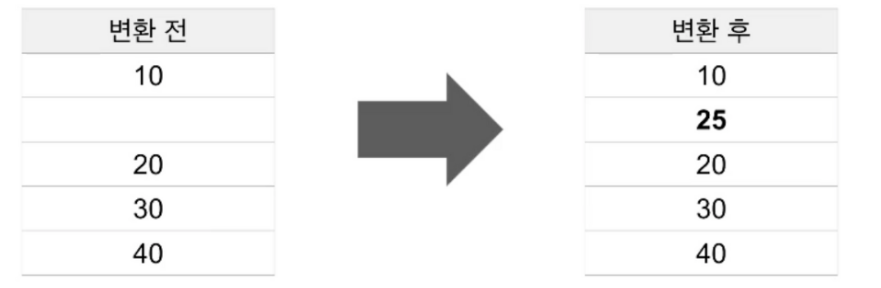

In [68]:
# from pyspark.ml.feature import Imputer

# Imputer 생성
## imputer = Imputer(inputCols=["age", "experience", "salary"],
##                  outputCols=["imputed_age", "imputed_experience", "imputed_salary"])
## imputer.setStrategy("mean")  # 결측치 대체 전략 설정

# Imputer 모델 피팅
## model = imputer.fit(df_pyspark)  # df_pyspark는 PySpark 데이터프레임입니다.

# 결측치 대체 적용
## imputed_df = model.transform(df_pyspark)

# 결과 확인
## imputed_df.show()

In [69]:
from pyspark.ml.feature import Imputer

# age / Experience / Salary에 대해 평균 값을 설정할 것이기 때문에
# 타입 변환 필수
# 이전에 Missing Values할 때 처음에 inferschema를 쓰는 인식 영상처럼 다 바뀌지않아서 infer schema를 하지 않음
# 방법 1 : 처음에 inferschema
# 방법 2 : 하나하나 cast
# 방법 1이 편하긴하지만 방법 2를 써봅시다.
from pyspark.sql.functions import col
df_pyspark = df_pyspark.withColumn('age', col('age').cast('integer'))
df_pyspark = df_pyspark.withColumn('Experience', col('Experience').cast('integer'))
df_pyspark = df_pyspark.withColumn('Salary', col('Salary').cast('integer'))

imputer = Imputer(
    inputCols = ['age', 'Experience', 'Salary'],
    outputCols = ["{}_imputed".format(c) for c in ['age', 'Experience', 'Salary']]
).setStrategy("mean")

In [70]:
imputer.fit(df_pyspark).transform(df_pyspark).show()

+--------+----+----------+------+-----------+------------------+--------------+
|    Name| age|Experience|Salary|age_imputed|Experience_imputed|Salary_imputed|
+--------+----+----------+------+-----------+------------------+--------------+
|   Krish|  31|        10| 30000|         31|                10|         30000|
|Sudhansh|  30|         8| 25000|         30|                 8|         25000|
|   Sunny|  29|         4| 20000|         29|                 4|         20000|
|    Paul|  24|         3| 20000|         24|                 3|         20000|
|  Harsha|  21|         1| 15000|         21|                 1|         15000|
| Shubham|  23|         2| 18000|         23|                 2|         18000|
|  Mahesh|null|      null| 40000|         28|                 5|         40000|
|    null|  34|        10| 38000|         34|                10|         38000|
|    null|  36|      null|  null|         36|                 5|         25750|
+--------+----+----------+------+-------